In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt



In [3]:
!wget -nc 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv'


--2023-10-01 07:49:06--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977501 (955K) [text/plain]
Saving to: ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’

WA_Fn-UseC_-Telco-C 100%[===================>] 954,59K  --.-KB/s    in 0,07s   

2023-10-01 07:49:06 (14,0 MB/s) - ‘WA_Fn-UseC_-Telco-Customer-Churn.csv’ saved [977501/977501]



In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

In [22]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [16]:
# convert totalcharges to number making unconvertable nulls
tc_num = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = tc_num
# fill na with zeros
df.totalcharges = df.totalcharges.fillna(0)

In [21]:
# Convert the target (churn) to numbers
df.churn = (df.churn == 'yes').astype(int)

# Setup validation

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [25]:
len(df_full_train), len(df_test)

(5634, 1409)

In [26]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [27]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [29]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

## Separate the target

In [30]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values


In [31]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

# EDA

In [32]:
df_full_train = df_full_train.reset_index(drop=True)

In [35]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

#### Churn rate

In [40]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate, 2)

0.27

In [45]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']

In [70]:
categorical = list(set(df_full_train.dtypes.index) - set(numerical + ['churn', 'customerid']))

In [71]:
df_full_train[categorical].nunique()

partner             2
phoneservice        2
onlinebackup        3
paperlessbilling    2
contract            3
gender              2
streamingmovies     3
internetservice     3
techsupport         3
onlinesecurity      3
streamingtv         3
paymentmethod       4
dependents          2
seniorcitizen       2
deviceprotection    3
multiplelines       3
dtype: int64

## Churn rate in different groups

In [72]:
df_full_train.groupby('gender').churn.mean()

gender
female    0.276824
male      0.263214
Name: churn, dtype: float64

In [73]:
churn_partner = df_full_train.groupby('partner').churn.mean()
churn_partner

partner
no     0.329809
yes    0.205033
Name: churn, dtype: float64

## Feature importance. Difference

`> 0` - less likely to churn  
`< 0` - more likely to churn

In [74]:
global_churn_rate - churn_partner['no'], global_churn_rate - churn_partner['yes'] 

(-0.05984095297455855, 0.06493474245795922)

## Feature importance. Risk ratio

works in relative terms

risk ratio = grop rate/ global rate

`> 1` - more likely to churn  
`< 1` - less likely to churn

Risk for churning for people without partner is much higher than population average

In [75]:
print(f'churn_rate_no_partner = {churn_partner["no"]/global_churn_rate}')
print(f'churn_rate_with_partner = {churn_partner["yes"]/global_churn_rate}')

churn_rate_no_partner = 1.2216593879412643
churn_rate_with_partner = 0.7594724924338315


In [76]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate
    display(df_group)
    print()
    print()

partner


,mean,count,diff,risk
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472




phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412




onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660




paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560




contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730




gender


,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980




streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182




internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201




techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390




onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570




streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328




paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121




dependents


,mean,count,diff,risk
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651




seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208




deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480




multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948


## Mutual information. A way to measure importance of categorical variables

concept from information theory, it tells us how much we can learn about one variable if we know the value of another

https://en.wikipedia.org/wiki/Mutual_information

In [77]:
from sklearn.metrics import mutual_info_score

mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [78]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [79]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [80]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

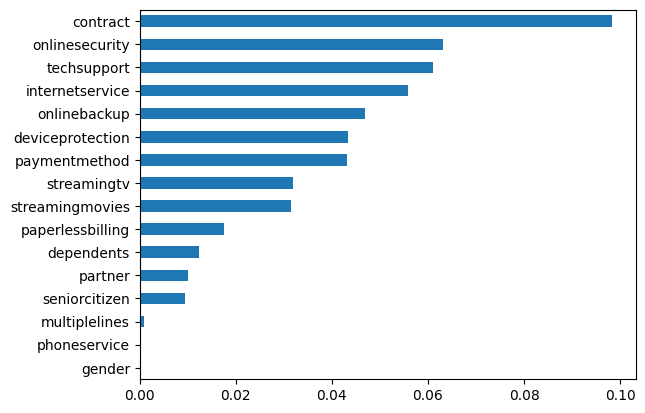

In [104]:
fig = plt.figure()
mi.sort_values().plot(kind='barh')
plt.yticks(range(len(mi)), labels=mi.sort_values().index);


## Correlation. A way to measure importance of categorical variables


In [105]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

# One-hot encoding
## Explore:

In [126]:
from sklearn.feature_extraction import DictVectorizer

In [127]:
dicts = df_train[['gender', 'contract', 'tenure']].iloc[:10].to_dict(orient='records')

In [128]:
dv = DictVectorizer(sparse=False)
dv.fit(dicts)

DictVectorizer(sparse=False)

In [129]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=two_year', 'gender=female',
       'gender=male', 'tenure'], dtype=object)

In [130]:
dv.transform(dicts)

array([[ 0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  0.,  1., 10.],
       [ 1.,  0.,  1.,  0.,  5.],
       [ 1.,  0.,  1.,  0.,  5.],
       [ 0.,  1.,  1.,  0., 18.],
       [ 1.,  0.,  0.,  1.,  4.],
       [ 1.,  0.,  0.,  1.,  1.],
       [ 1.,  0.,  1.,  0.,  1.],
       [ 0.,  1.,  1.,  0., 72.],
       [ 1.,  0.,  1.,  0.,  6.]])

## Fit the actual data

In [131]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

In [133]:
val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

# Logistic regression

In [134]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

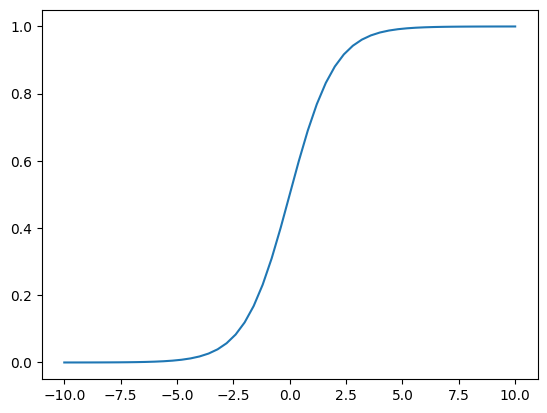

In [136]:
z = np.linspace(-10, 10, 51)
plt.plot(z, sigmoid(z))

# Training Logistic Regression with Scikit-learn

In [137]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [142]:
model.intercept_[0].round(3)

-0.109

In [139]:
model.coef_[0].round(3)

array([ 0.475, -0.175, -0.408, -0.03 , -0.078,  0.063, -0.089, -0.081,
       -0.034, -0.073, -0.335,  0.316, -0.089,  0.004, -0.258,  0.141,
        0.009,  0.063, -0.089, -0.081,  0.266, -0.089, -0.284, -0.231,
        0.124, -0.166,  0.058, -0.087, -0.032,  0.07 , -0.059,  0.141,
       -0.249,  0.215, -0.12 , -0.089,  0.102, -0.071, -0.089,  0.052,
        0.213, -0.089, -0.232, -0.07 ,  0.   ])

Hard predictions:

In [143]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

Probabilities (soft predictions)

In [166]:
probs = model.predict_proba(X_val)
probs

array([[0.99100278, 0.00899722],
       [0.79548139, 0.20451861],
       [0.7877827 , 0.2122173 ],
       ...,
       [0.86360882, 0.13639118],
       [0.20023445, 0.79976555],
       [0.16259705, 0.83740295]])

Probability of churning:

In [167]:
y_pred = probs[:, 1]

In [168]:
churn_decision = (y_pred >= 0.5)

The email with a promotion will be sent to these customers:

In [169]:
df_val[churn_decision].customerid

3       8433-wxgna
8       3440-jpscl
11      2637-fkfsy
12      7228-omtpn
19      6711-fldfb
           ...    
1397    5976-jcjrh
1398    2034-cgrhz
1399    5276-kqwhg
1407    6521-yytyi
1408    3049-solay
Name: customerid, Length: 311, dtype: object

In [170]:
(y_val == churn_decision).mean()

0.8034066713981547

In [172]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val

In [174]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [175]:
df_pred

,probability,prediction,actual,correct
0,0.008997,0,0,True
1,0.204519,0,0,True
2,0.212217,0,0,True
3,0.543044,1,1,True
4,0.213780,0,0,True
...,...,...,...,...
1404,0.313678,0,0,True
1405,0.039360,0,1,False
1406,0.136391,0,0,True
1407,0.799766,1,1,True


In [176]:
df_pred.correct.mean()

0.8034066713981547